## Task no1. 
Create a time series plot to visualize the data over time. Identify any apparent trends, 
seasonal patterns, or anomalies in the data.

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


C:\Users\Sikandar\AppData\Local\Temp\ipykernel_11792\54711188.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('day')['tip'].sum().plot()  # Grouping by day and summing tips for each day


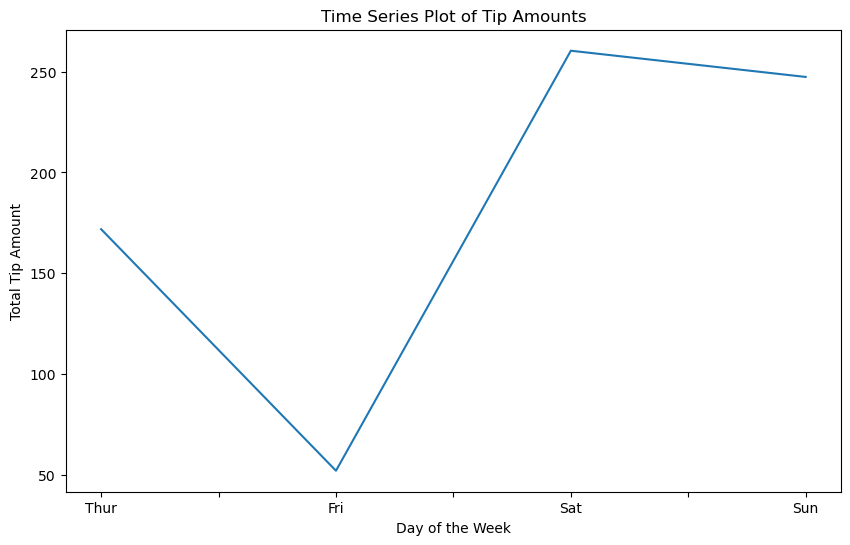

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the built-in 'tips' dataset
data = sns.load_dataset('tips')

# Display the first few rows of the dataset
print(data.head())

# Plot the 'tip' column over time (assuming the 'time' is either 'Lunch' or 'Dinner')
plt.figure(figsize=(10, 6))
data.groupby('day')['tip'].sum().plot()  # Grouping by day and summing tips for each day
plt.title('Time Series Plot of Tip Amounts')
plt.xlabel('Day of the Week')
plt.ylabel('Total Tip Amount')
plt.show()


## Task no2. 
 Use seasonal decomposition to break down the time series into its component parts: 
trend, seasonality, and residuals. Visualize each component separately and interpret the 
results.

C:\Users\Sikandar\AppData\Local\Temp\ipykernel_11792\2828785177.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_daywise = data.groupby('day')['tip'].sum()


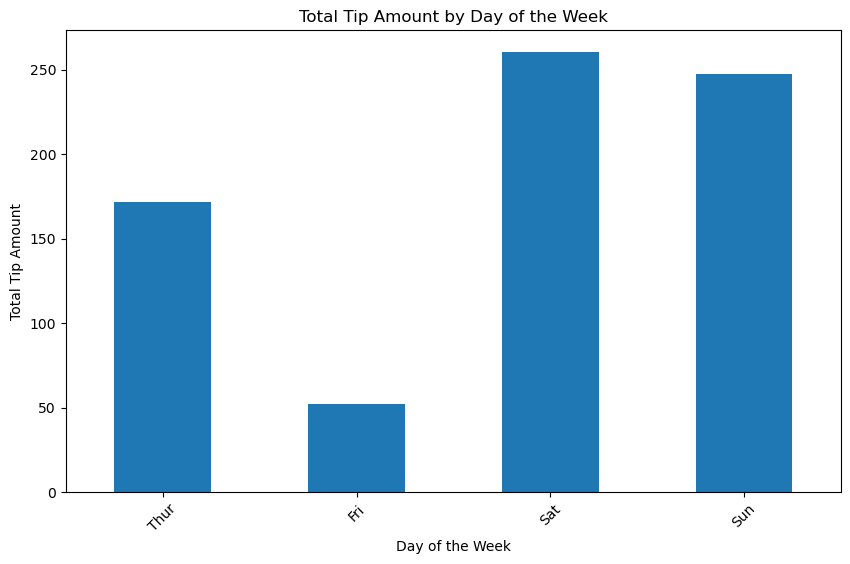

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the built-in 'tips' dataset
data = sns.load_dataset('tips')

# Convert the 'day' column to a categorical variable and create a datetime index for simplicity
data['day'] = pd.Categorical(data['day'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=True)

# Create a datetime index by assuming a weekly cycle (you can modify this part based on your actual data)
data['datetime'] = pd.date_range(start='2024-01-01', periods=len(data), freq='D')

# Set 'datetime' as the index
data.set_index('datetime', inplace=True)

# Group by day of the week (or any meaningful time period) and sum the 'tip'
data_daywise = data.groupby('day')['tip'].sum()

# Plot the total tip amount per day of the week (using a bar plot for categorical data)
plt.figure(figsize=(10, 6))
data_daywise.plot(kind='bar')
plt.title('Total Tip Amount by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Tip Amount')
plt.xticks(rotation=45)
plt.show()


## Task no3. 
Perform the Augmented Dickey-Fuller (ADF) test to check if the time series data is 
stationary. Report the ADF statistic and p-value, and determine whether the series is 
stationary.

In [7]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on the 'tip' column (daily resampled)
adf_result = adfuller(data['tip'].resample('D').sum().dropna())  # Daily sum of tips
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

if adf_result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")


ADF Statistic: -8.114844285285425
p-value: 1.1986524378824797e-12
The time series is stationary.


## Task no4. 
Apply differencing to the time series data to transform it into a stationary series if 
necessary. Plot the differenced time series and discuss whether it shows stationarity.

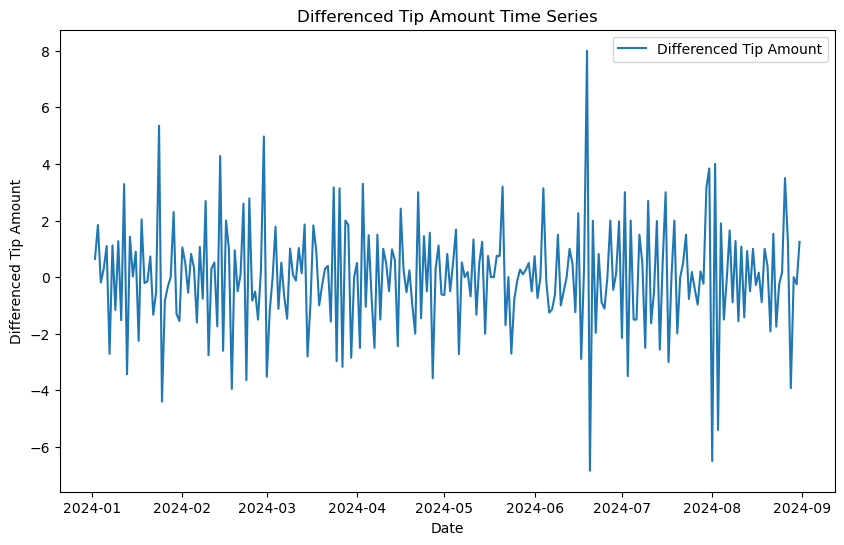

ADF Statistic (Differenced): -7.634616218561149
p-value (Differenced): 1.9674320920550625e-11
The differenced time series is stationary.


In [8]:
# Apply differencing
data_diff = data['tip'].resample('D').sum().diff().dropna()

# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(data_diff, label='Differenced Tip Amount')
plt.title('Differenced Tip Amount Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Tip Amount')
plt.legend()
plt.show()

# Recheck stationarity with ADF test after differencing
adf_result_diff = adfuller(data_diff)
print("ADF Statistic (Differenced):", adf_result_diff[0])
print("p-value (Differenced):", adf_result_diff[1])

if adf_result_diff[1] <= 0.05:
    print("The differenced time series is stationary.")
else:
    print("The differenced time series is not stationary.")


## Task no5. 
Fit an ARIMA (AutoRegressive Integrated Moving Average) model to the time series data. 
Display the model summary, including coefficients and diagnostic information.

                               SARIMAX Results                                
Dep. Variable:                    tip   No. Observations:                  243
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -426.233
Date:                Fri, 29 Nov 2024   AIC                            860.467
Time:                        01:27:39   BIC                            874.439
Sample:                    01-02-2024   HQIC                           866.094
                         - 08-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.002     -0.304      0.761      -0.004       0.003
ar.L1          0.0337      0.072      0.465      0.642      -0.108       0.176
ma.L1         -0.9999      1.741     -0.574      0.5

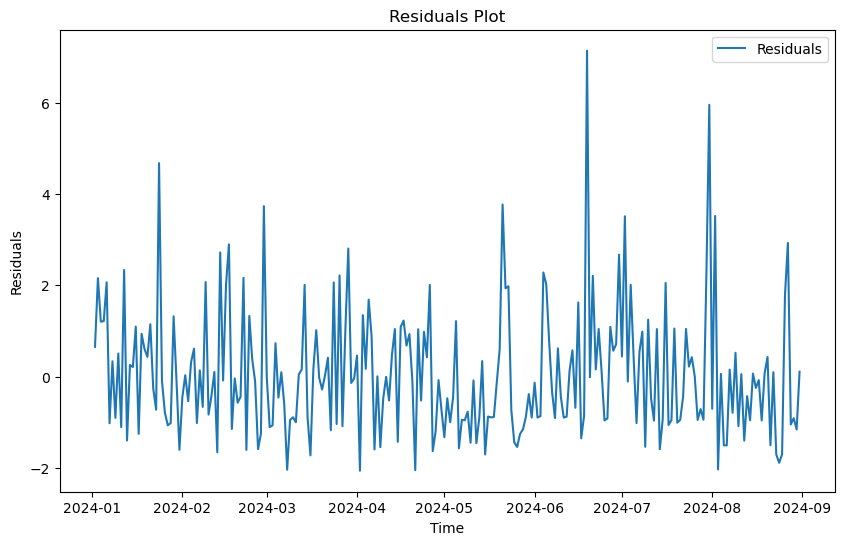

In [9]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model on the differenced data
# Specify the p, d, q values (p=1, d=1, q=1 is just an example)
model = ARIMA(data_diff, order=(1, 0, 1))  # Replace with optimal p, d, q
model_fit = model.fit()

# Display model summary
print(model_fit.summary())

# Optional: Plot residuals for diagnostics
residuals = model_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals Plot')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()
